In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

In [3]:
category_tree = pd.read_csv('/content/drive/My Drive/recommender_system/archive/category_tree.csv')

In [4]:
events = pd.read_csv('/content/drive/My Drive/recommender_system/archive/events.csv')

In [5]:
item_properties_part1 = pd.read_csv('/content/drive/My Drive/recommender_system/archive/item_properties_part1.csv')
item_properties_part2 = pd.read_csv('/content/drive/My Drive/recommender_system/archive/item_properties_part2.csv')

In [6]:
events.head(10)

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
5,1433224086234,972639,view,22556,NaN
6,1433221923240,810725,view,443030,NaN
7,1433223291897,794181,view,439202,NaN
8,1433220899221,824915,view,428805,NaN
9,1433221204592,339335,view,82389,NaN


In [7]:
len(events['itemid'].unique())

235061

In [8]:
events[events['visitorid']== 794181]

,timestamp,visitorid,event,itemid,transactionid
7,1433223291897,794181,view,439202,NaN
1493060,1430772760584,794181,view,434171,NaN
1500839,1430772684144,794181,view,434171,NaN
1500895,1430772829525,794181,view,434171,NaN
2027282,1432994209532,794181,view,110943,NaN


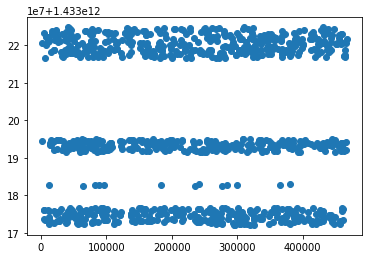

In [9]:
plt.scatter(events.iloc[:1000,3],events.iloc[:1000,0])

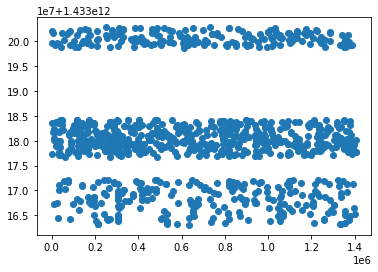

In [10]:
plt.scatter(events.iloc[1000:2000,1],events.iloc[1000:2000,0])

In [11]:
max_timestamp = np.max((events.timestamp.max(),item_properties_part1.timestamp.max()))
item_properties_sorted = item_properties_part1.sort_values("timestamp")

In [12]:
item_properties_sorted["lag_value"] = item_properties_sorted.groupby(["itemid","property"]).value.shift(1)

In [13]:
item_properties_sorted

,timestamp,itemid,property,value,lag_value
8019207,1431226800000,213522,159,519769,NaN
10102067,1431226800000,390382,6,1206195,NaN
3649339,1431226800000,339404,917,n70811753686296.000,NaN
3649340,1431226800000,259726,283,571547 212916 n14052.000,NaN
3649342,1431226800000,388781,227,1005705 98427,NaN
...,...,...,...,...,...
6863534,1442113200000,288382,776,663129,663129
3504876,1442113200000,230998,123,1116693,NaN
3504867,1442113200000,369917,available,0,0
8534085,1442113200000,408592,888,477187 n12.000 n252108.000 726612 86628 769062...,477187 n12.000 n252108.000


In [14]:
item_properties_sorted["lead_timestamp"] = item_properties_sorted.groupby(["itemid",
    "property"]).timestamp.shift(-1)

In [16]:
item_properties_sorted

,timestamp,itemid,property,value,lag_value,lead_timestamp
8019207,1431226800000,213522,159,519769,NaN,NaN
10102067,1431226800000,390382,6,1206195,NaN,NaN
3649339,1431226800000,339404,917,n70811753686296.000,NaN,NaN
3649340,1431226800000,259726,283,571547 212916 n14052.000,NaN,NaN
3649342,1431226800000,388781,227,1005705 98427,NaN,NaN
...,...,...,...,...,...,...
6863534,1442113200000,288382,776,663129,663129,NaN
3504876,1442113200000,230998,123,1116693,NaN,NaN
3504867,1442113200000,369917,available,0,0,NaN
8534085,1442113200000,408592,888,477187 n12.000 n252108.000 726612 86628 769062...,477187 n12.000 n252108.000,NaN


In [17]:
item_properties_sorted.tail(10)

,timestamp,itemid,property,value,lag_value,lead_timestamp
3504902,1442113200000,382283,888,1044042 992862 647924 364963 n25.920 1135780 1...,1044042 992862 647924 364963 n25.920 1135780 1...,NaN
3504900,1442113200000,178302,294,83273 140286,NaN,NaN
3504893,1442113200000,374530,776,1277656,1277656,NaN
5872455,1442113200000,229864,678,6517 1009260,6517 1009260,NaN
3504887,1442113200000,147327,364,790670,790670,NaN
6863534,1442113200000,288382,776,663129,663129,NaN
3504876,1442113200000,230998,123,1116693,NaN,NaN
3504867,1442113200000,369917,available,0,0,NaN
8534085,1442113200000,408592,888,477187 n12.000 n252108.000 726612 86628 769062...,477187 n12.000 n252108.000,NaN
818193,1442113200000,6960,888,249879 577633 305726 992862 647924 221748 5998...,249879 577633 305726 992862 647924 221748 5998...,NaN


In [18]:
item_properties_sorted["is_change"] = np.logical_or(item_properties_sorted.lag_value.isna(),
    item_properties_sorted.lag_value!=item_properties_sorted.value) 

In [19]:
item_properties_sorted

,timestamp,itemid,property,value,lag_value,lead_timestamp,is_change
8019207,1431226800000,213522,159,519769,NaN,NaN,True
10102067,1431226800000,390382,6,1206195,NaN,NaN,True
3649339,1431226800000,339404,917,n70811753686296.000,NaN,NaN,True
3649340,1431226800000,259726,283,571547 212916 n14052.000,NaN,NaN,True
3649342,1431226800000,388781,227,1005705 98427,NaN,NaN,True
...,...,...,...,...,...,...,...
6863534,1442113200000,288382,776,663129,663129,NaN,False
3504876,1442113200000,230998,123,1116693,NaN,NaN,True
3504867,1442113200000,369917,available,0,0,NaN,False
8534085,1442113200000,408592,888,477187 n12.000 n252108.000 726612 86628 769062...,477187 n12.000 n252108.000,NaN,True


In [20]:
item_properties_sorted = item_properties_sorted[item_properties_sorted.is_change]

In [21]:
item_properties_sorted

,timestamp,itemid,property,value,lag_value,lead_timestamp,is_change
8019207,1431226800000,213522,159,519769,NaN,NaN,True
10102067,1431226800000,390382,6,1206195,NaN,NaN,True
3649339,1431226800000,339404,917,n70811753686296.000,NaN,NaN,True
3649340,1431226800000,259726,283,571547 212916 n14052.000,NaN,NaN,True
3649342,1431226800000,388781,227,1005705 98427,NaN,NaN,True
...,...,...,...,...,...,...,...
8534016,1442113200000,334094,available,1,0,NaN,True
3504942,1442113200000,114528,888,1114818 1175087 783494 n360.000 424566 1115 12...,653611 1175087 783494 n360.000 424566 1115 129...,NaN,True
3504900,1442113200000,178302,294,83273 140286,NaN,NaN,True
3504876,1442113200000,230998,123,1116693,NaN,NaN,True


In [22]:
item_properties_sorted["lead_timestamp"] = item_properties_sorted.groupby(["itemid",
    "property"]).timestamp.shift(-1)

<ipython-input-22-3852dd0acec7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_properties_sorted["lead_timestamp"] = item_properties_sorted.groupby(["itemid",


In [23]:
item_properties_sorted

,timestamp,itemid,property,value,lag_value,lead_timestamp,is_change
8019207,1431226800000,213522,159,519769,NaN,NaN,True
10102067,1431226800000,390382,6,1206195,NaN,NaN,True
3649339,1431226800000,339404,917,n70811753686296.000,NaN,NaN,True
3649340,1431226800000,259726,283,571547 212916 n14052.000,NaN,NaN,True
3649342,1431226800000,388781,227,1005705 98427,NaN,NaN,True
...,...,...,...,...,...,...,...
8534016,1442113200000,334094,available,1,0,NaN,True
3504942,1442113200000,114528,888,1114818 1175087 783494 n360.000 424566 1115 12...,653611 1175087 783494 n360.000 424566 1115 129...,NaN,True
3504900,1442113200000,178302,294,83273 140286,NaN,NaN,True
3504876,1442113200000,230998,123,1116693,NaN,NaN,True


In [24]:
item_properties_sorted["lead_timestamp"].fillna(max_timestamp, inplace=True)
item_properties_sorted["lead_timestamp"] = item_properties_sorted["lead_timestamp"]\
    .astype("int64")

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-24-f4148485a427>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_properties_sorted["lead_timestamp"] = item_properties_sorted["lead_timestamp"]\


In [25]:
item_properties_sorted

,timestamp,itemid,property,value,lag_value,lead_timestamp,is_change
8019207,1431226800000,213522,159,519769,NaN,1442545187788,True
10102067,1431226800000,390382,6,1206195,NaN,1442545187788,True
3649339,1431226800000,339404,917,n70811753686296.000,NaN,1442545187788,True
3649340,1431226800000,259726,283,571547 212916 n14052.000,NaN,1442545187788,True
3649342,1431226800000,388781,227,1005705 98427,NaN,1442545187788,True
...,...,...,...,...,...,...,...
8534016,1442113200000,334094,available,1,0,1442545187788,True
3504942,1442113200000,114528,888,1114818 1175087 783494 n360.000 424566 1115 12...,653611 1175087 783494 n360.000 424566 1115 129...,1442545187788,True
3504900,1442113200000,178302,294,83273 140286,NaN,1442545187788,True
3504876,1442113200000,230998,123,1116693,NaN,1442545187788,True


In [26]:
item_properties_sorted.rename({"timestamp":"valid_start",
    "lead_timestamp":"valid_end"}, axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [27]:
item_properties_sorted

,valid_start,itemid,property,value,lag_value,valid_end,is_change
8019207,1431226800000,213522,159,519769,NaN,1442545187788,True
10102067,1431226800000,390382,6,1206195,NaN,1442545187788,True
3649339,1431226800000,339404,917,n70811753686296.000,NaN,1442545187788,True
3649340,1431226800000,259726,283,571547 212916 n14052.000,NaN,1442545187788,True
3649342,1431226800000,388781,227,1005705 98427,NaN,1442545187788,True
...,...,...,...,...,...,...,...
8534016,1442113200000,334094,available,1,0,1442545187788,True
3504942,1442113200000,114528,888,1114818 1175087 783494 n360.000 424566 1115 12...,653611 1175087 783494 n360.000 424566 1115 129...,1442545187788,True
3504900,1442113200000,178302,294,83273 140286,NaN,1442545187788,True
3504876,1442113200000,230998,123,1116693,NaN,1442545187788,True


In [28]:
item_properties = item_properties_sorted.loc[:,("valid_start", "valid_end",
    "itemid", "property", "value")]

In [29]:
item_properties

,valid_start,valid_end,itemid,property,value
8019207,1431226800000,1442545187788,213522,159,519769
10102067,1431226800000,1442545187788,390382,6,1206195
3649339,1431226800000,1442545187788,339404,917,n70811753686296.000
3649340,1431226800000,1442545187788,259726,283,571547 212916 n14052.000
3649342,1431226800000,1442545187788,388781,227,1005705 98427
...,...,...,...,...,...
8534016,1442113200000,1442545187788,334094,available,1
3504942,1442113200000,1442545187788,114528,888,1114818 1175087 783494 n360.000 424566 1115 12...
3504900,1442113200000,1442545187788,178302,294,83273 140286
3504876,1442113200000,1442545187788,230998,123,1116693


In [30]:
item_properties["time_valid"] = item_properties.valid_end - item_properties.valid_start

In [31]:
item_properties

,valid_start,valid_end,itemid,property,value,time_valid
8019207,1431226800000,1442545187788,213522,159,519769,11318387788
10102067,1431226800000,1442545187788,390382,6,1206195,11318387788
3649339,1431226800000,1442545187788,339404,917,n70811753686296.000,11318387788
3649340,1431226800000,1442545187788,259726,283,571547 212916 n14052.000,11318387788
3649342,1431226800000,1442545187788,388781,227,1005705 98427,11318387788
...,...,...,...,...,...,...
8534016,1442113200000,1442545187788,334094,available,1,431987788
3504942,1442113200000,1442545187788,114528,888,1114818 1175087 783494 n360.000 424566 1115 12...,431987788
3504900,1442113200000,1442545187788,178302,294,83273 140286,431987788
3504876,1442113200000,1442545187788,230998,123,1116693,431987788


In [32]:
del item_properties_sorted, max_timestamp
item_properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7122608 entries, 8019207 to 8534085
Data columns (total 6 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   valid_start  int64 
 1   valid_end    int64 
 2   itemid       int64 
 3   property     object
 4   value        object
 5   time_valid   int64 
dtypes: int64(4), object(2)
memory usage: 380.4+ MB


In [47]:
df_test = pd.DataFrame({"Col1": [20, 20, 15, 20, 45],
...                    "Col2": [13, 23, 18, 23, 18],
...                    "Col3": [17, 27, 22, 37, 52]})

In [48]:
df_test['new_col'] = df_test.groupby(['Col1','Col2']).Col3.shift(1)

In [49]:
df_test

,Col1,Col2,Col3,new_col
0,20,13,17,NaN
1,20,23,27,NaN
2,15,18,22,NaN
3,20,23,37,27.0
4,45,18,52,NaN
